In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("style.mplstyle")

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, silhouette_score


KMEANS_N_CLUSTERS_LIMIT = 10
RANDOM_STATE = 42

In [2]:
df = pd.read_csv('data.csv', index_col=0)

# Rename rooms pino to roommate1, max to roommate2
df['room'] = df['room'].replace({'pino': 'flat-mate-1', 'max': 'flat-mate-2', 'mic': 'my-room'})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1950 entries, 0 to 1949
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   -FASTWEB-B46191                1950 non-null   float64
 1   room                           1950 non-null   object 
 2   -TIM-31632150                  1950 non-null   float64
 3   -Vodafone-A87551308            1950 non-null   float64
 4   -FASTWEB-1-KqaCbNB8gxDV        1950 non-null   float64
 5   -central perk                  1950 non-null   float64
 6   -iliadbox-6119A6_5Ghz          1950 non-null   float64
 7   -Marchello                     1950 non-null   float64
 8   -SKY1D90F                      1950 non-null   float64
 9   -TISCALI5G-D7C773              1950 non-null   float64
 10  -iliadbox-6119A6_2.4Ghz        1950 non-null   float64
 11  -IBZ Docenti                   1950 non-null   float64
 12  -IBZ Segreteria                1950 non-null   f

In [3]:
df.sample(5)

,-FASTWEB-B46191,room,-TIM-31632150,-Vodafone-A87551308,-FASTWEB-1-KqaCbNB8gxDV,-central perk,-iliadbox-6119A6_5Ghz,-Marchello,-SKY1D90F,-TISCALI5G-D7C773,...,-TP-Link_372D,-S23+ di Marco,-ShellyPlus2PM-30C9228656CC,-IBZ Direzione,-N30,-SSID,-Redmi 9,-SMARTCAM_17155,-DIRECT-KE-BRAVIA,-SoundBarSetup_B7C5
1783,30.0,my-room,24.0,52.0,62.0,82.0,78.0,66.0,66.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1534,18.0,bathroom,10.0,44.0,0.0,122.0,38.0,54.0,56.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0
1821,36.0,my-room,14.0,38.0,56.0,68.0,82.0,62.0,66.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1349,38.0,flat-mate-2,18.0,50.0,42.0,82.0,58.0,58.0,88.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,12.0
1505,22.0,bathroom,0.0,48.0,30.0,122.0,42.0,58.0,54.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,0.0


In [4]:
X = df.drop('room', axis=1)
y = df['room']

print(f'Dataframe shape: {df.shape}')
print(f'\nRooms:\n{df.room.value_counts()}')

Dataframe shape: (1950, 67)

Rooms:
bathroom       400
kitchen        400
flat-mate-2    400
my-room        400
flat-mate-1    350
Name: room, dtype: int64


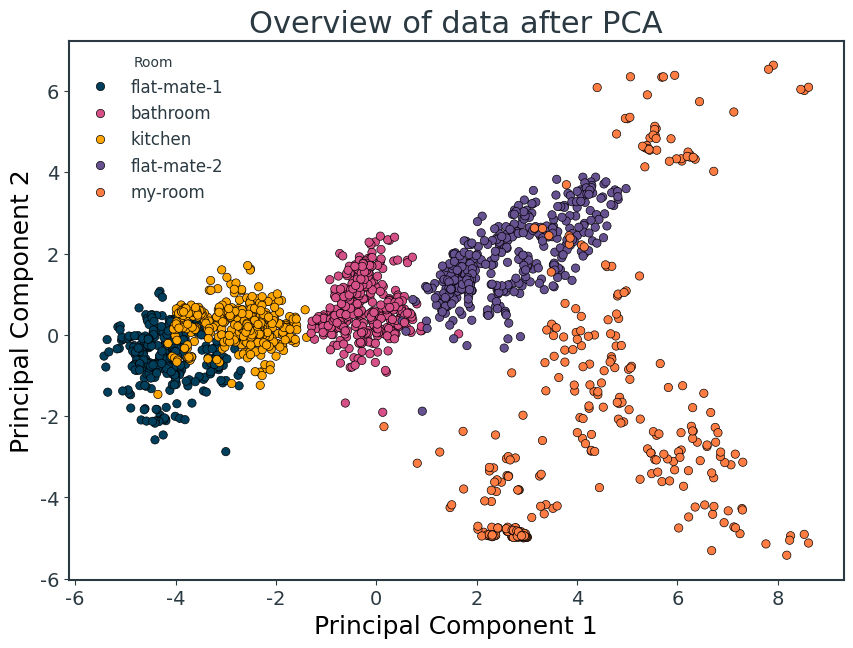

In [5]:
# Encode the room labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
labels = label_encoder.classes_

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['room'] = y.values

# Create a scatter plot with Seaborn
plt.figure()
scatter = sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='room', ec='black')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Overview of data after PCA')
plt.legend(title='Room')
plt.show()

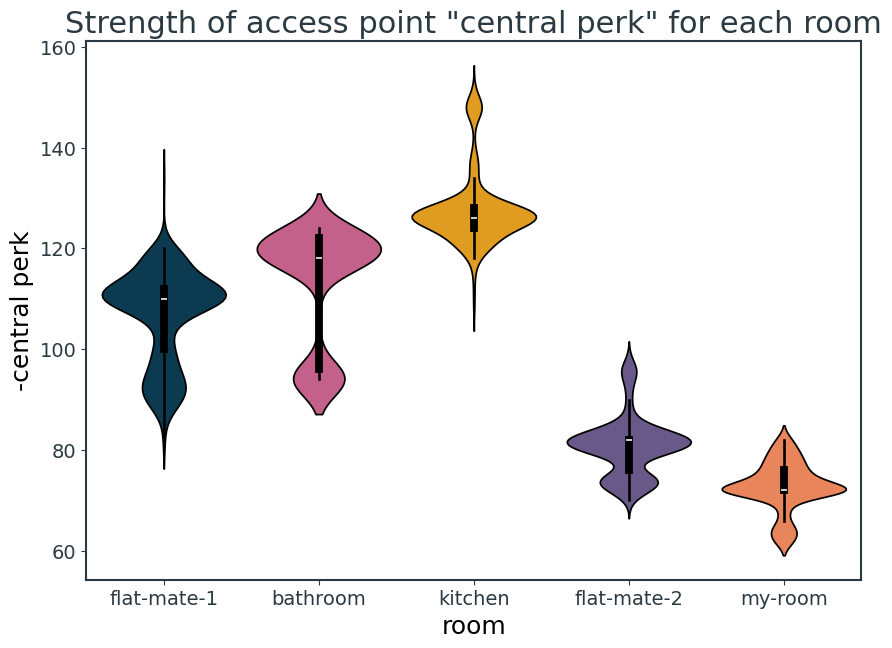

In [6]:
plt.figure()
sns.violinplot(data=df, x='room', y='-central perk', hue='room', linecolor="black")
plt.title('Strength of access point "central perk" for each room')
plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE)

print(f'Training set shape: {X_train.shape}')
print(f'Validation set shape: {X_val.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (1248, 66)
Validation set shape: (312, 66)
Test set shape: (390, 66)


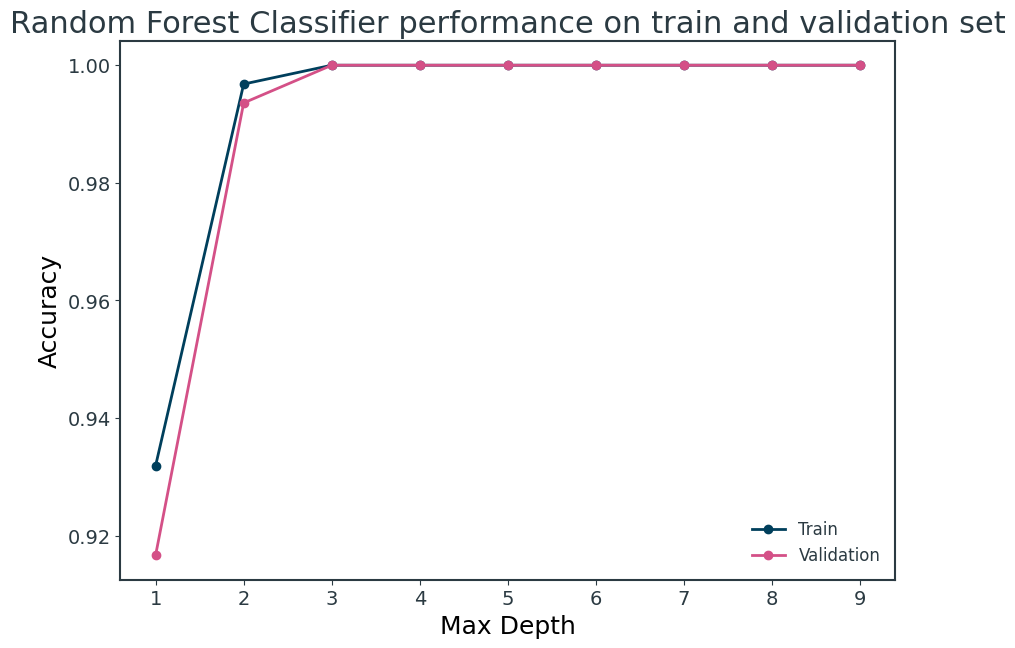

In [8]:
train_scores, val_scores = list(), list()
values = [i for i in range(1, 10)]
for i in values:
    model = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=RANDOM_STATE)
    
    # Fit model on the training dataset
    model.fit(X_train, y_train)
    
    # Evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    # Evaluate on the validation dataset
    val_yhat = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_yhat)
    val_scores.append(val_acc)
    
plt.title('Random Forest Classifier performance on train and validation set')
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, val_scores, '-o', label='Validation')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

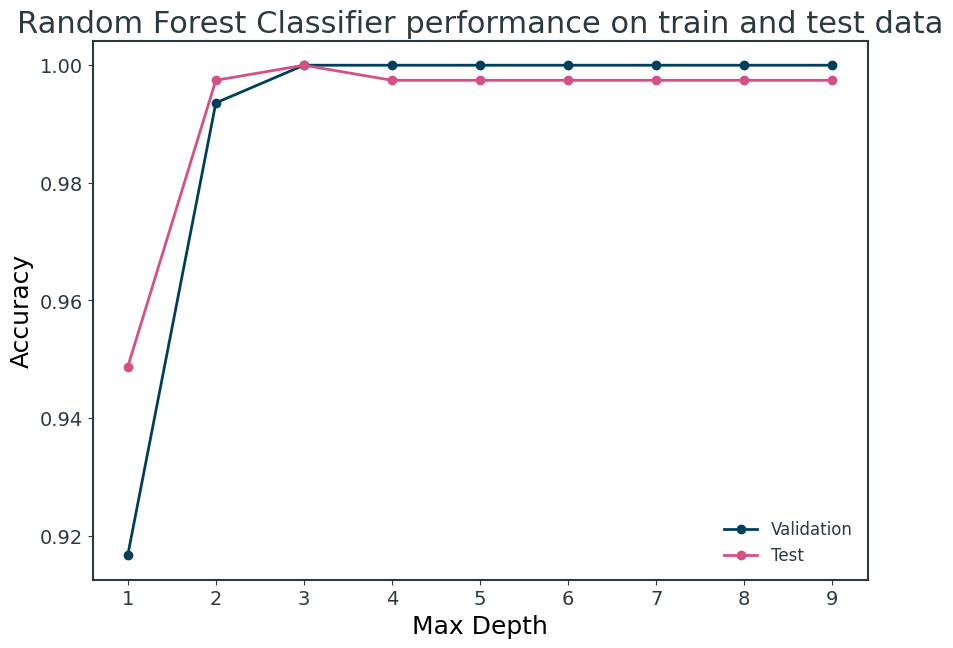

In [9]:
test_scores = list()
for i in values:
    model = RandomForestClassifier(n_estimators=100, max_depth=i, random_state=RANDOM_STATE)
    
    model.fit(X_train, y_train)
    
    # Evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    
plt.title('Random Forest Classifier performance on train and test data')
plt.plot(values, val_scores, '-o', label='Validation')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

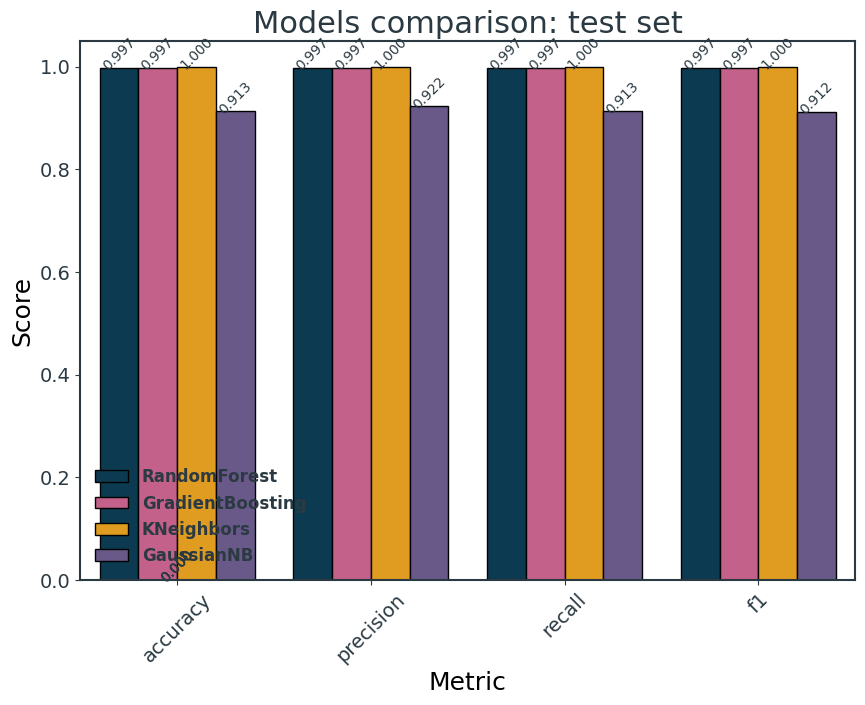

In [10]:
from sklearn.naive_bayes import GaussianNB

models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, random_state=RANDOM_STATE),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "GaussianNB": GaussianNB(), 
} 

results = {name: {} for name in models.keys()}  

for name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)  
    
    # Predict on the validation set
    y_pred = model.predict(X_test)
    
    # Calculate and store evaluation metrics for validation set
    results[name]["test_accuracy"] = accuracy_score(y_true=y_test, y_pred=y_pred, normalize=True)
    results[name]["test_precision"] = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')
    results[name]["test_recall"] = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')
    results[name]["test_f1"] = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
    
    # print(f"{name} classification report\n {classification_report(y_test, y_pred)}\n")
    # print(f"{name}\nAccuracy: {results[name]['test_accuracy']:.2f}\nPrecision: {results[name]['test_precision']:.2f}\nRecall: {results[name]['test_recall']:.2f}\nF1: {results[name]['test_f1']:.2f}\n")

# Convert the results dictionary to a DataFrame
model_results_df = pd.DataFrame(results).T

# Reshape the DataFrame from wide to long format
model_results_df = model_results_df.reset_index().melt(id_vars='index', var_name='metric', value_name='score')
model_results_df.rename(columns={'index': 'model'}, inplace=True)

# Separate metric type and set type
model_results_df[['set', 'metric']] = model_results_df['metric'].str.split('_', expand=True)

# Plotting
plt.figure()
sns.barplot(data=model_results_df, x='metric', y='score', hue='model', ec='black')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.title('Models comparison: test set')
plt.xticks(rotation=45)
plt.legend(loc="lower left", prop={'weight': 'bold'})

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation=45)

plt.show()

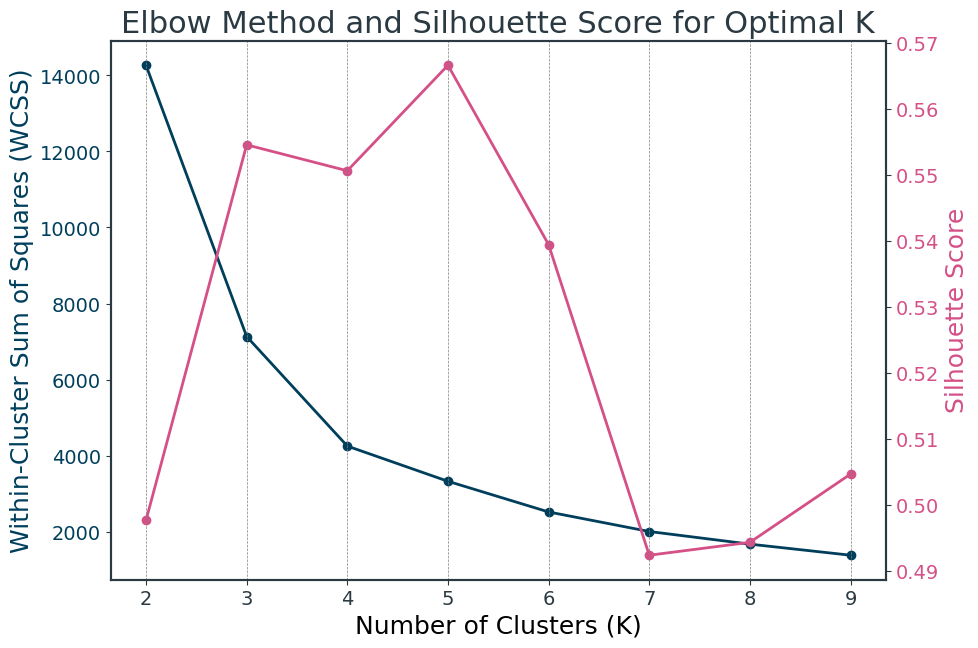

In [11]:
scaler = StandardScaler()
pca = PCA(n_components=2)

X_scaled = StandardScaler().fit_transform(X)
principal_components = pca.fit_transform(X_scaled)

wcss = []
silhouette_scores = []

for k in range(2, KMEANS_N_CLUSTERS_LIMIT):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(principal_components)
    wcss.append(kmeans.inertia_)
    
    if k > 1:
        silhouette_scores.append(silhouette_score(principal_components, cluster_labels))

# Plotting both Elbow Method and Silhouette Score
fig, ax1 = plt.subplots()

color = '#003f5c'
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Within-Cluster Sum of Squares (WCSS)', color=color)
ax1.plot(range(2, KMEANS_N_CLUSTERS_LIMIT), wcss, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = '#d45087'
ax2.set_ylabel('Silhouette Score', color=color)
ax2.plot(range(2, KMEANS_N_CLUSTERS_LIMIT), silhouette_scores, marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(range(2, KMEANS_N_CLUSTERS_LIMIT))

for i, k in enumerate(range(2, KMEANS_N_CLUSTERS_LIMIT)):
    plt.axvline(x=k, linestyle='--', color='gray', linewidth=0.5)

plt.title('Elbow Method and Silhouette Score for Optimal K')
plt.show()

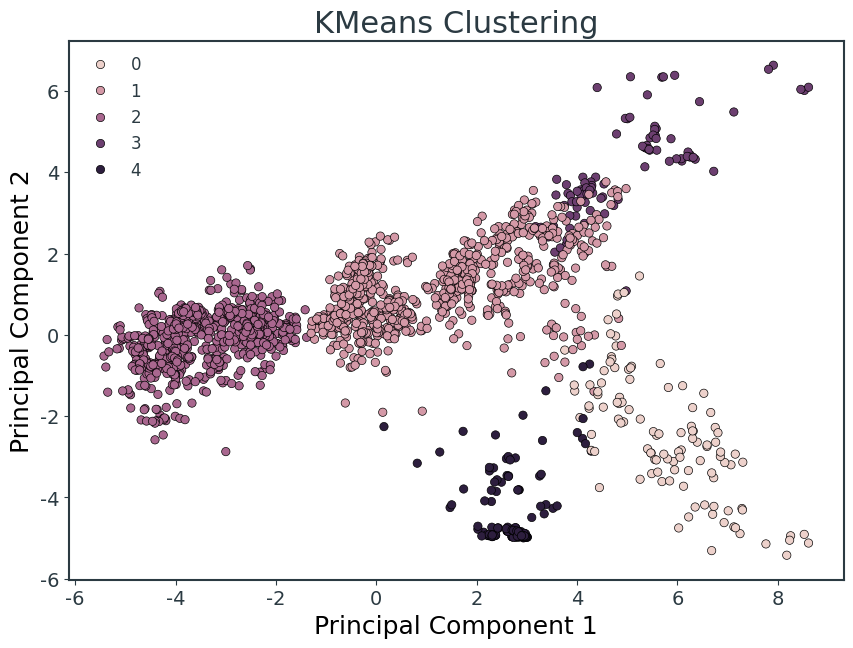

In [12]:
K = 5

# Plot the Kmeans result for 5
kmeans = KMeans(n_clusters=K, random_state=RANDOM_STATE)
cluster_labels = kmeans.fit_predict(X_scaled)
df['cluster'] = cluster_labels

plt.figure()
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=cluster_labels, ec='black')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

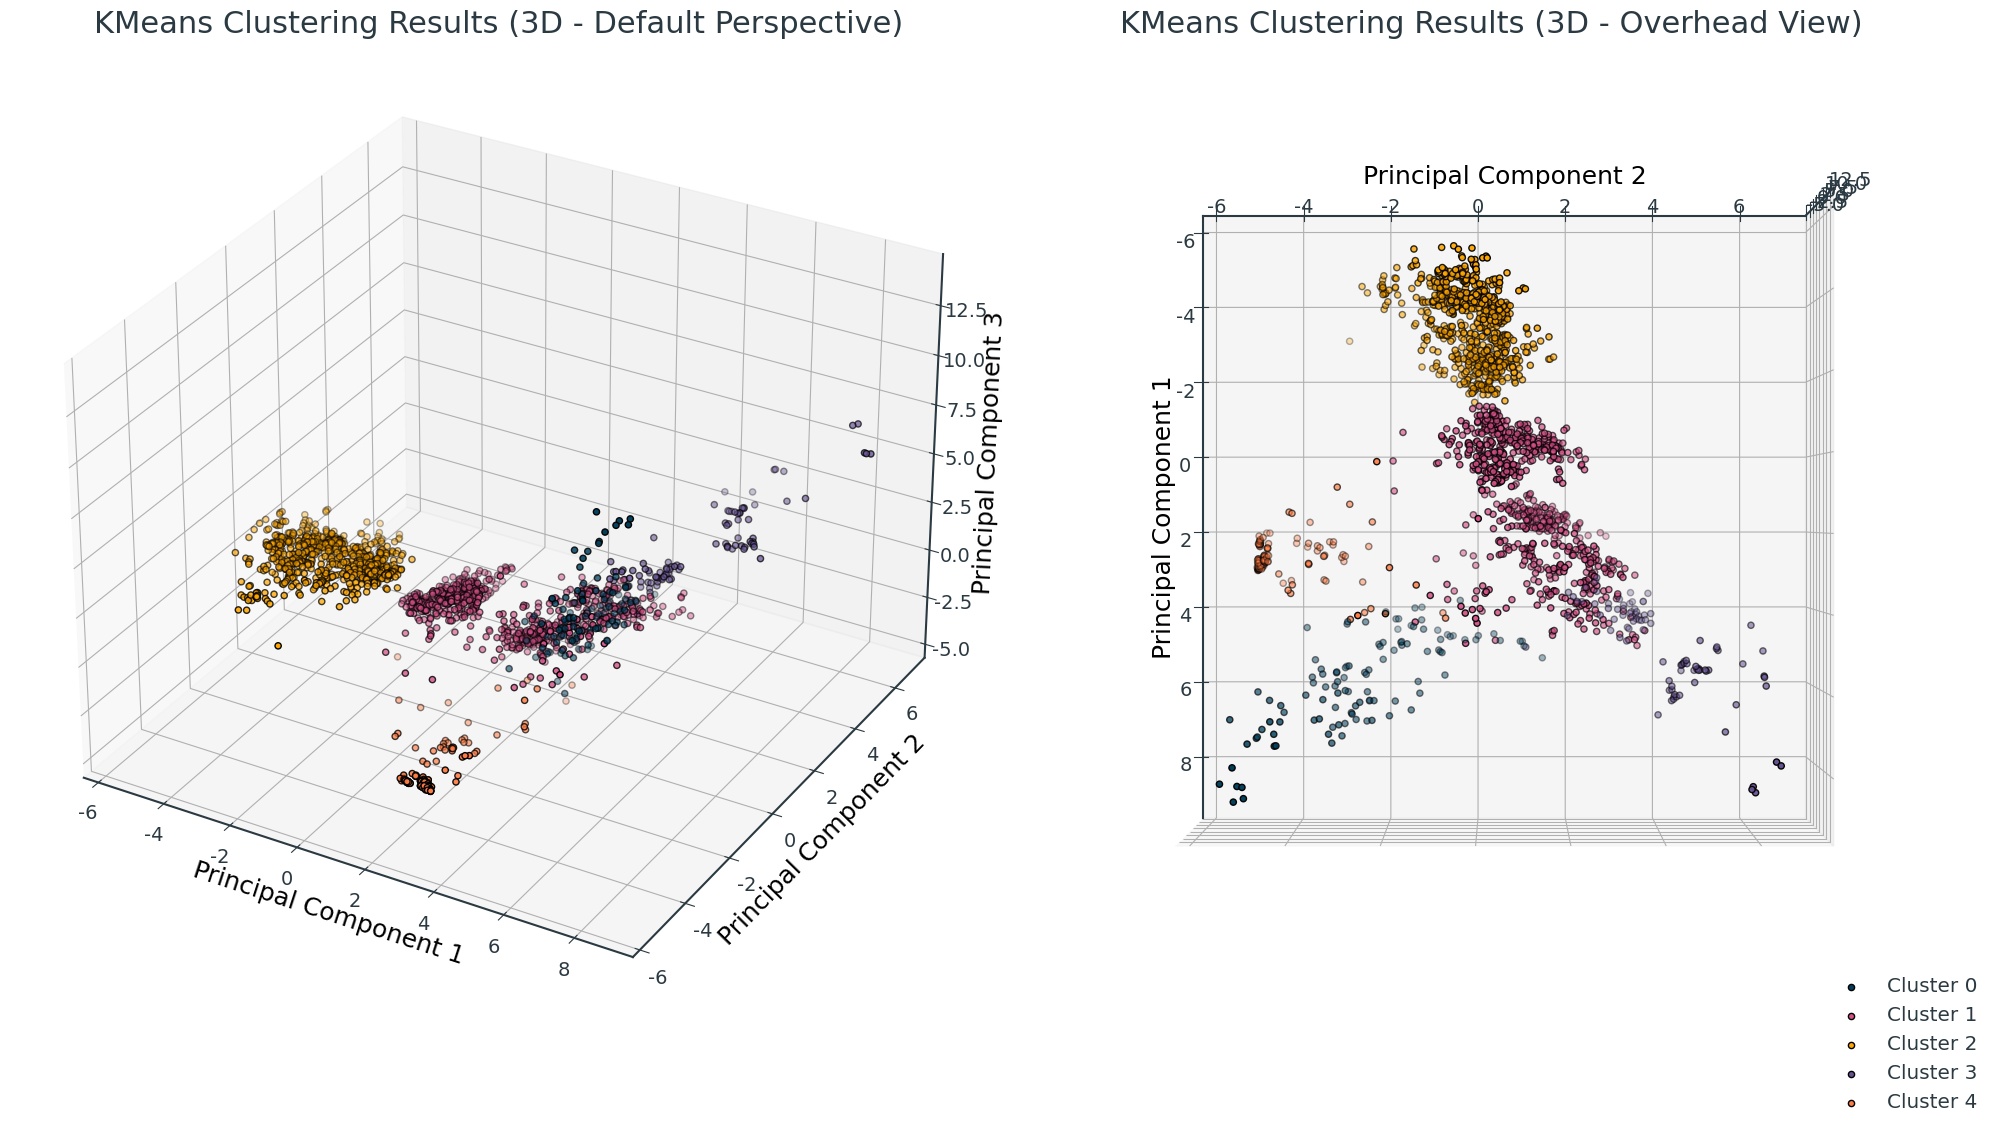

In [13]:
# Perform PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 4)])

# Add the 'cluster' column to the reduced DataFrame
pc_df['cluster'] = cluster_labels

# Plotting the results in 3D with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 12), subplot_kw={'projection': '3d'})

# Plot 1 - Default Perspective
ax1 = axes[0]
for cluster in range(K):
    cluster_points = pc_df[pc_df['cluster'] == cluster]
    ax1.scatter(cluster_points['PC1'], cluster_points['PC2'], cluster_points['PC3'], label=f'Cluster {cluster}', ec='black')

ax1.set_title('KMeans Clustering Results (3D - Default Perspective)')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')

# Plot 2 - Overhead Perspective
ax2 = axes[1]
for cluster in range(K):
    cluster_points = pc_df[pc_df['cluster'] == cluster]
    ax2.scatter(cluster_points['PC1'], cluster_points['PC2'], cluster_points['PC3'], label=f'Cluster {cluster}', ec='black')

ax2.set_title('KMeans Clustering Results (3D - Overhead View)')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
# ax2.set_zlabel('Principal Component 3')

# Set the view to an overhead perspective for the second plot
ax2.view_init(elev=90, azim=0)

# Increase the legend fontsize
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', fontsize='x-large')

plt.tight_layout()
plt.show()